In [178]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generating graph using networkx library

In [179]:
# Function to create a random graph
def create_random_graph(num_nodes, max_edge_weight, max_degree):
    G = nx.Graph()
    nodes = [int(0 + i) for i in range(num_nodes)]  # Generate node labels from 0, 1, 2, ...
    G.add_nodes_from(nodes)

    # Ensure the graph is connected
    for i in range(1, num_nodes):
        # Add at least one edge to connect each node to the graph
        G.add_edge(nodes[i-1], nodes[i], weight=random.randint(1, max_edge_weight))

    # Add random edges
    additional_edges = random.randint(num_nodes, num_nodes * max_degree // 2)  # total edges
    while G.number_of_edges() < additional_edges:
        a, b = random.sample(nodes, 2)
        if not G.has_edge(a, b):
            G.add_edge(a, b, weight=random.randint(1, max_edge_weight))

    return G

In [180]:
G = create_random_graph(10, 20, 4)

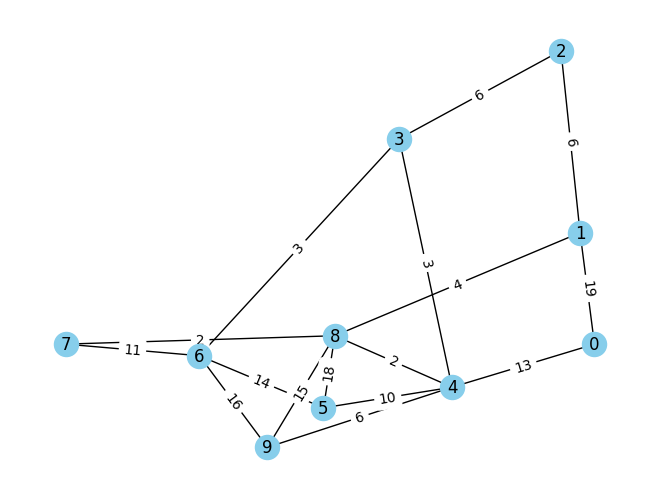

In [181]:
# Visualization
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# Genatic Algorithm
### Fitness Function: total distance of the tour
### Selection: picks the next generation
### Crossover: ordered crossover
### Mutation: randomly swap 2 cities
### Hall of Fame: keeps track of best solution

In [182]:
from deap import base, creator, tools, algorithms
import numpy as np

In [183]:
def tsp_fitness(individual, graph):
    weight = 0
    penalty = 100  # A large penalty for missing edges
    for i in range(1, len(individual)):
        try:
            weight += graph[individual[i-1]][individual[i]]['weight']
        except KeyError:
            weight += penalty
    # Close the tour by returning to the starting node
    try:
        weight += graph[individual[-1]][individual[0]]['weight']
    except KeyError:
        weight += penalty
    return (weight,)


In [184]:
# Set up the Genetic Algorithm
def setup_ga_tsp(graph, population_size, crossover_prob, mutation_prob, n_generations):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    nodes = list(graph.nodes())

    # Attribute generator
    toolbox.register("indices", random.sample, nodes, len(nodes))

    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", tsp_fitness, graph=graph)

    # Create initial population
    pop = toolbox.population(n=population_size)

    # Apply GA
    hof = tools.HallOfFame(1)  # Hall of fame to store the best individual
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    algorithms.eaSimple(pop, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=n_generations, stats=stats, halloffame=hof, verbose=True)

    return hof[0]

In [185]:
def visualize_tsp_solution(graph, tour):
    pos = nx.spring_layout(graph)  # positions for all nodes using a layout strategy
    
    # Draw the graph
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

    # Highlight the tour
    tour_edges = [(tour[i], tour[(i + 1) % len(tour)]) for i in range(len(tour))]
    nx.draw_networkx_nodes(graph, pos, nodelist=tour, node_color='blue', node_size=500)
    nx.draw_networkx_edges(graph, pos, edgelist=tour_edges, edge_color='red', width=2)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

    plt.title("TSP Solution Visualization")
    plt.show()

In [186]:
# Parameters
population_size = 10
crossover_prob = 0.7
mutation_prob = 0.2
n_generations = 10

In [187]:
# G = create_random_graph(num_nodes, max_weight, max_degree)

In [188]:
# Apply GA
best_tour = setup_ga_tsp(G, population_size, crossover_prob, mutation_prob, n_generations)
print("Best tour:", best_tour)
print("Best tour length:", tsp_fitness(best_tour, G)[0])
print("penalty of missing edges: ", tsp_fitness(best_tour, G)[0] - G.size("weight"))

gen	nevals	avg  	min	max
0  	10    	660.9	543	814
1  	8     	610.7	539	828
2  	8     	537.6	375	648
3  	9     	555.8	442	648
4  	10    	565  	391	744
5  	10    	585  	356	914
6  	8     	550.3	485	644
7  	8     	572.1	530	725
8  	7     	564.4	434	723
9  	10    	588.7	267	808
10 	8     	564.6	267	726
Best tour: [8, 1, 0, 4, 9, 5, 6, 3, 2, 7]
Best tour length: 267
penalty of missing edges:  119.0


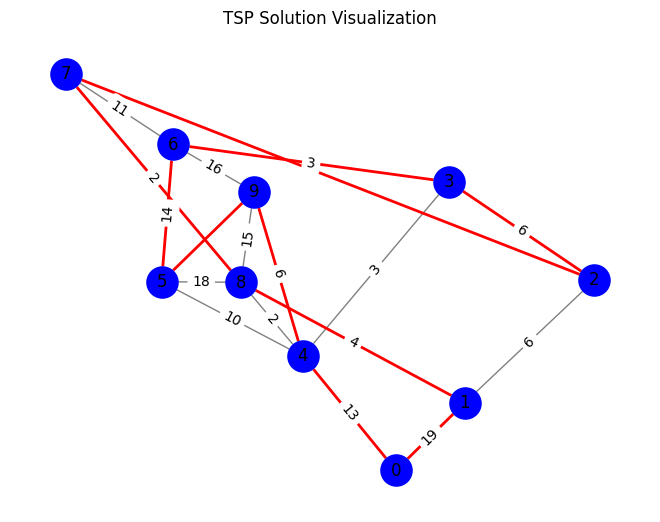

In [189]:
visualize_tsp_solution(G, best_tour)